cdfからtplot変数を作成

In [19]:
import pyspedas
import pytplot
from pytplot import options
from pytplot import tplot
from pytplot import tlimit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
'''
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
'''
pytplot.cdf_to_tplot('ak_h1_mca_19900105_v02.cdf')
tplot_names = pytplot.tplot_names(True)

for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_power = (10**(tplot_variable.y/10)) * (tplot_variable_0dB**2) / bandwidth 
    pytplot.store_data(tplot_names[i] +'_power', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})


プロット

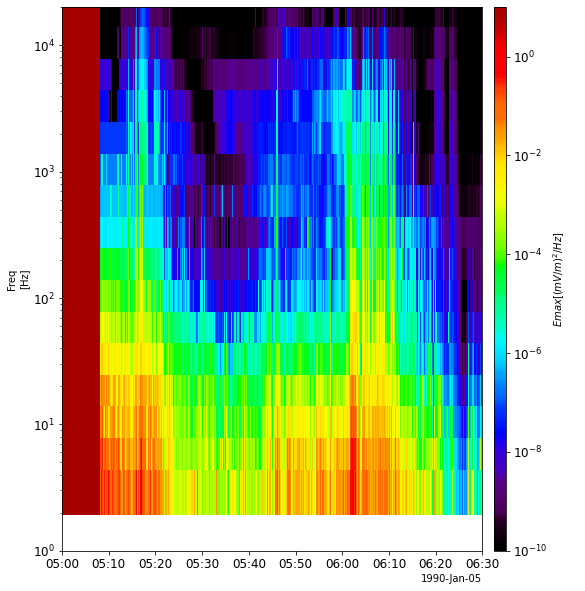

In [23]:
tlimit(['1990-01-05 05:00:00', '1990-01-05 06:30:00'])
options('Emax_power', 'spec', 1)
options('Emax_power', 'ytitle', 'Freq')
options('Emax_power', 'ysubtitle', '[Hz]')
options('Emax_power', 'ztitle', '$Emax [(mV/m)^2/Hz]$')
options('Emax_power', 'zrange', [1e-10, 1e1])
options('Emax_power', 'yrange', [1,20000])
options('Emax_power', 'ylog', 1)
options('Emax_power', 'zlog', 1)
options('Bmax_power', 'spec', 1)
options('Bmax_power', 'ytitle', 'Freq')
options('Bmax_power', 'ysubtitle', '[Hz]')
options('Bmax_power', 'ztitle', '$Bmax [pT^2/Hz]$')
options('Bmax_power', 'zrange', [1e-8, 1e5])
options('Bmax_power', 'yrange', [1,20000])
options('Bmax_power', 'ylog', 1)
options('Bmax_power', 'zlog', 1)
tplot('Emax_power', slice = True)


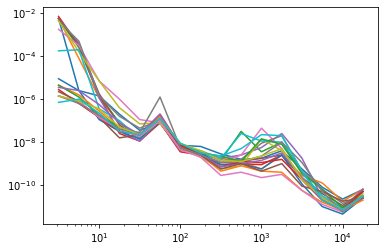

In [22]:
Emax_power = pytplot.get_data('Emax_power')
time = Emax_power.times
slice_time = pyspedas.time_double('1990-01-05 06:00:00')
for i in range(time.size):
    if time[i] > slice_time:
        pass
    else:
        slice_time_index = i
        slice_time = time[i]
        break
Emax_power_slice = Emax_power.y[slice_time_index]
freq_range = Emax_power.v
import matplotlib.pyplot as plt
plt.figure()
for i in range(20):
    plt.plot(freq_range, Emax_power.y[slice_time_index + i])
plt.xscale('log')
plt.yscale('log')

0
1
2


In [18]:
Emax_power = pytplot.get_data('Emax_power')
Emax, Emax_power

(variable(times=array([6.13180804e+08, 6.13180812e+08, 6.13180820e+08, ...,
        6.13267180e+08, 6.13267188e+08, 6.13267196e+08]), y=array([[ 89,  93,  91, ...,  47,  52,  28],
        [104, 103, 100, ...,  47,  44,  38],
        [106, 104, 103, ...,  65,  59,  54],
        ...,
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), v=array([3.16e+00, 5.62e+00, 1.00e+01, 1.78e+01, 3.16e+01, 5.62e+01,
        1.00e+02, 1.78e+02, 3.16e+02, 5.62e+02, 1.00e+03, 1.78e+03,
        3.16e+03, 5.62e+03, 1.00e+04, 1.78e+04], dtype=float32)),
 variable(times=array([6.13180804e+08, 6.13180812e+08, 6.13180820e+08, ...,
        6.13267180e+08, 6.13267188e+08, 6.13267196e+08]), y=array([[8.37898917e-04, 1.18342961e-03, 4.19641804e-04, ...,
         2.97264055e-11, 5.28297731e-11, 1.18156806e-13],
        [2.64966903e-02, 1.18342961e-02, 3.33333333e-03, ...,
         2.97264055e-11, 8.37295477e-12, 1.1815

In [10]:
tplot_names = pytplot.tplot_names()
tplot_names

0 : Emax
1 : Eave
2 : Bmax
3 : Bave
4 : PostGap
5 : Emax_power
6 : Eave_power
7 : Bmax_power
8 : Bave_power


['Emax',
 'Eave',
 'Bmax',
 'Bave',
 'PostGap',
 'Emax_power',
 'Eave_power',
 'Bmax_power',
 'Bave_power']

In [8]:
Emax = pytplot.get_data('Emax')
E0 = 1e-6
bandwidth = Emax.v * 0.3
Emax_power = (10**(Emax/10)) * (E0**2) / bandwidth
pytplot.store_data('Emax_power', data={'x': Emax.times, 'y': Emax_power, 'v': Emax.v})
options('Emax_power', 'spec', 1)
options('Emax_power', 'ytitle', 'Emax')
options('Emax_power', 'ysubtitle', '[Hz]')
options('Emax_power', 'ztitle', '$[(mV/m)]$')
options('Emax_power', 'zrange', [1e-10, 1e1])
options('Emax_power', 'yrange', [1,20000])
options('Emax_power', 'ylog')
tlimit(['1989-06-07 01:26:00', '1989-06-07 01:36:00'])
tplot(['Emax_power'])

array([9.4800007e-01, 1.6860000e+00, 3.0000000e+00, 5.3400002e+00,
       9.4800005e+00, 1.6860001e+01, 3.0000002e+01, 5.3400002e+01,
       9.4800003e+01, 1.6860001e+02, 3.0000000e+02, 5.3400000e+02,
       9.4800006e+02, 1.6860001e+03, 3.0000000e+03, 5.3400000e+03],
      dtype=float32)

In [3]:
bandwidth = np.array([0.94, 1.66, 3, 5.4, 9.4, 16.6, 30, 54, 94, 166, 300, 540, 940, 1660, 3000, 5400])
Eave = Eave[start_time:end_time]
Eave = (10**(Eave/10)) * (E0**2) /bandwidth

NameError: name 'np' is not defined